In [26]:
from target_func import f as f
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.integrate as integrate
import spline as sms

In [27]:
max_degree = 20
n_func = max_degree + 1

left = -3
right = 3

# $x^ i$

In [28]:
def base_prod(i, j, a, b):
    return (
        ((b**(i + j + 1)) - (a**(i + j + 1))) 
        / (i + j  +1)
    )

In [29]:
A_xi = (
    np.array([[base_prod(i, j, left, right) for j in range(n_func)] for i in range(n_func)])
)

b_xi = np.array([integrate.quad(lambda x: f(x) * x**i, left, right)[0] for i in range(n_func)])

x_sol_xi = np.linalg.solve(A_xi, b_xi)

# check truthness
cond_xi = np.allclose(np.dot(A_xi, x_sol_xi), b_xi)

if cond_xi:
    print("Ok")

Ok


In [30]:
# for print
print("{:<8} {:<10}".format("i","c_i"))
print("{:<8} {:<10}".format("-","---"))
      
i = 0
for el in x_sol_xi:
    print("{:<8} {:<10}".format(i, round(el, 3)))
    i += 1

i        c_i       
-        ---       
0        1.624     
1        -0.821    
2        -2.641    
3        3.288     
4        3.765     
5        -6.239    
6        -3.798    
7        5.37      
8        2.529     
9        -2.5      
10       -1.038    
11       0.686     
12       0.264     
13       -0.114    
14       -0.042    
15       0.011     
16       0.004     
17       -0.001    
18       -0.0      
19       0.0       
20       0.0       


In [31]:
def pol_xi(x, coefs):
    n = len(coefs)
    
    pol = 0
    for i in range(n):
        pol += coefs[i] * x**i
        
    return pol

$$ Q_{x^i}(x) = \sum_{i=0}^n c_i \varphi_i $$

In [32]:
err_xi = round(np.sqrt(integrate.quad(lambda x: (f(x) - pol_xi(x, x_sol_xi))**2, -3 ,3)[0]), 3)

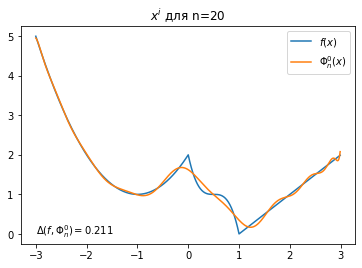

In [33]:
x_data = np.arange(left, right, 0.01)
y_data = [f(x) for x in x_data]
y_data_approx_xi = [pol_xi(x, x_sol_xi) for x in x_data]

plt.plot(x_data, y_data, label="$f(x)$")
plt.plot(x_data, y_data_approx_xi, label="$\Phi_{n}^{0}(x)$")
plt.title(fr"$x^i$ для n={max_degree}")
plt.text(-3,0, f"$\Delta(f, \Phi_n^0)={err_xi}$")
plt.legend()

#plt.savefig(f"algebraic_poly_f_q_{n_func}.png", dpi=300)  # render image

# $\sin(ix), \cos(ix)$

In [34]:
trig_degree = 50
n_func = 2 * trig_degree + 1

In [35]:
def trig_base(x, i: int):
    if i == 0:
        return 1

    if i % 2 == 0:
        k = int(i / 2)
        return np.sin(k * x)
    
    k = int(i / 2) + 1
    
    return np.cos(k * x)

$$ x(t) = \frac{3t}{\pi}, t \in [-\pi, \pi] $$
$$ x(-\pi) = -3, x(\pi) = 3 $$

In [36]:
def trig_base_norm(i: int):
    if i == 0:
        return 2 * np.pi
    
    return np.pi

In [37]:
# main
def x_(t):
    return  3 * t / np.pi

def t_(x):
    return np.pi * x / 3

c_main = [integrate.quad(lambda t: trig_base(t, i) * f(x_(t)), -np.pi, np.pi)[0]
              / trig_base_norm(i) for i in range(n_func)]

In [38]:
# # other
# A_trig = np.zeros((n_func, n_func))
# for i in range(n_func):
#     for j in range(n_func):
#         A_trig[i][j] = integrate.quad(lambda x: trig_base(x, i) * trig_base(x, j), -3, 3)[0]

# b_trig = np.zeros(n_func)
# for i in range(n_func):
#     b_trig[i] = integrate.quad(lambda x: trig_base(x, i) * f(x), -3, 3)[0]

# c_other = np.linalg.solve(A_trig, b_trig)

In [39]:
# # for print
# print("{:<8} {:<10}".format("i","c_i"))
      
# i = 0
# for el in c_main:
#     print("{:<8} {:<10}".format(i, round(el, 3)))
#     i += 1

$$ Q(x)_{trig} = \sum_{i=0}^n c_i \varphi_i$$

In [40]:
def pol_trig(x, coefs):
    n = len(coefs)
    
    pol = 0
    
    pol += coefs[0]
    
    for i in range(1, n):
        pol += coefs[i] * trig_base(x, i)
        
    return pol

In [41]:
err_trig1 = round(np.sqrt(integrate.quad(lambda x: (f(x) - pol_trig(t_(x), c_main))**2, -3, 0, ))[0], 3)
err_trig2 = round(np.sqrt(integrate.quad(lambda x: (f(x) - pol_trig(t_(x), c_main))**2, 0, 3, ))[0], 3)

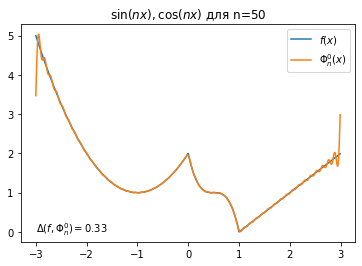

In [42]:
#y_data_trig_other = [pol_trig(x, c_other) for x in x_data]
y_data_trig_main = [pol_trig(t_(x), c_main) for x in x_data]

plt.plot(x_data, y_data, label="$f(x)$")
plt.plot(x_data, y_data_trig_main, label="$\Phi_{n}^{0}(x)$")
plt.title(f"$\sin(nx), \cos(nx)$ для n={trig_degree}")
plt.text(-3,0, f"$\Delta(f, \Phi_n^0)={err_trig1 + err_trig2}$")
plt.legend()

plt.savefig(f"trig_approx_{n_func}.png", dpi=300)  # render image

# Згладж сплайн

In [43]:
n_intervals = 50
n = n_intervals + 1
x_nodes = np.linspace(-3, 3, n)
y_nodes = [f(x) for x in x_nodes]

rho = 1
rho_i = [rho for _ in range(n)]

In [44]:
A = sms.mat_a(x_nodes)
H = sms.mat_h(x_nodes)
R = sms.mat_r(rho_i)
f_ = y_nodes

In [45]:
left_part = A + (H @ np.linalg.inv(R) @ H.T)
right_part = H @ f_
m_res = np.linalg.solve(left_part, right_part)

In [46]:
mu = f_ - (np.linalg.inv(R) @ H.T @ m_res)

In [47]:
error_val = round(np.sqrt(integrate.quad(lambda x: (f(x) - sms.smoothing_spline3(x, x_nodes, mu, m_res))**2, -3 ,3)[0]), 3)

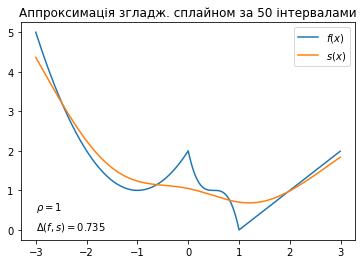

In [48]:
y_data_spline = [sms.smoothing_spline3(x, x_nodes, mu, m_res) for x in x_data]

plt.plot(x_data, y_data, label=r"$f(x)$")
plt.plot(x_data, y_data_spline, label=r"$s(x)$")
plt.title(f"Аппроксимація згладж. сплайном за {n_intervals} інтервалами")
plt.text(-3,0, f"$\Delta(f, s)={error_val}$")
plt.text(-3,0.5, fr"$\rho={rho}$")
plt.legend()

plt.savefig(f"Smoothin_{n}_rho_{rho}.png", dpi=300)  # render image